<IPython.core.display.Javascript object>


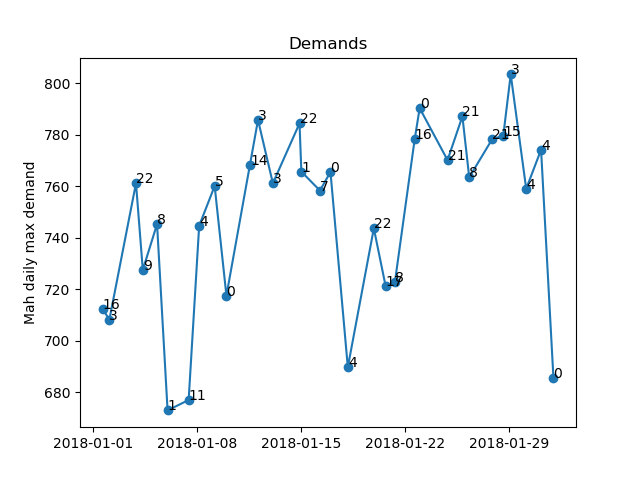

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 12 19:18:39 2018

@author: Nagasudhir
"""

# import the pandas module into a variable called pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import numpy as np
import datetime
%matplotlib notebook
date_base = datetime.datetime.strptime("01/01/1900 00:00:00", "%d/%m/%Y %H:%M:%S")

    
# import excel
df = pd.read_excel('demand.xlsx', \
                   sheet_name='Sheet1', skiprows=3, usecols=range(0, 12), skip_footer=5\
                   )

#df.boxplot()
dates = []
for i in range(df.shape[0]):
    if(i%24 == 0):
        curr_date = date_base + datetime.timedelta(days=int(df.iloc[i,0])-2, hours = 1)
        dates.append(curr_date)
    else:
        dates.append(curr_date + datetime.timedelta(hours=int(df.iloc[i,0])-1))

df.index = dates

df = df.drop(df.columns[[0,1]], axis=1)

daily_max_hrs = df.groupby(df.index.date).apply(lambda x: x.idxmax())

daily_max_vals = df.groupby(df.index.date).apply(lambda x: x.max())

#plt.gca().xaxis.set_minor_locator(plticker.MultipleLocator(base=1))
plt.plot(daily_max_hrs.iloc[:,5], daily_max_vals.iloc[:,5], 'o-')
for i in range(daily_max_vals.shape[0]):
    plt.gca().annotate(daily_max_hrs.iloc[i,5].hour, (daily_max_hrs.iloc[i,5],daily_max_vals.iloc[i,5]))
plt.ylabel('Mah daily max demand')
plt.title('Demands')
plt.show()


In [7]:
plt.savefig('esil_max_demands.png')